# Titanic Kaggle Competition

The Titanic challenge on Kaggle is a competition in which the goal is to predict the survival or the death of a given passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat.



In [95]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Data Analysis 

In [4]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
import numpy as np
path = "/Users/bfiliot/Desktop/ENSAE/Machine Learning/TITANIC/"

We first import the dataset. It contains 891 observations / passengers. 
A few words a about some of the explanatory variables :

* Survived : equals 1 if the passenger survived, 0 otherwise ; 
* Pclass : 1,2 or 3 ; 
* SibSp : number of siblings (brothers, sisters) and spouses (husbands, wifes) traveling with the passenger ; 
* Parch : number of parents and children traveling with the passenger ;
* Ticket : the ticket number ;
* Fare : the ticket Fare ;
* Cabin : the cabin number ;
* Embarked : the embarkation : S,C,Q.

In [6]:
data = pd.read_csv(path+"train.csv", sep=",")
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We check if there are missing values. 

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

And create a temporary df where missing ages are removed.

In [8]:
temp = data.dropna(subset=['Age'])

### Sex

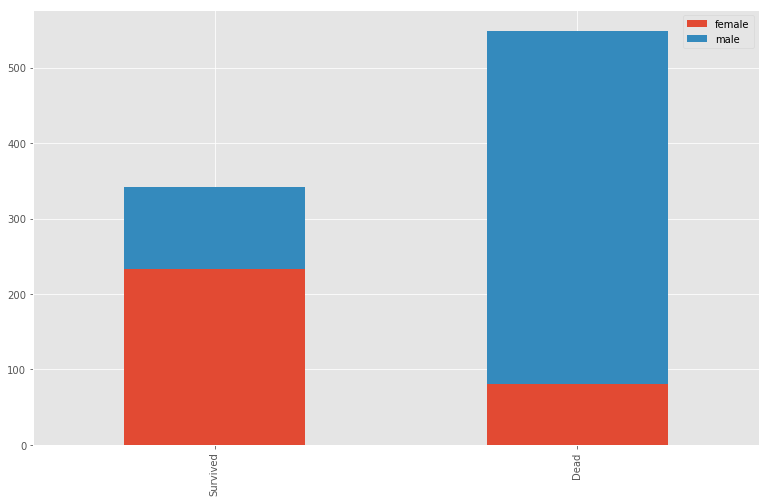

In [9]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

### Age

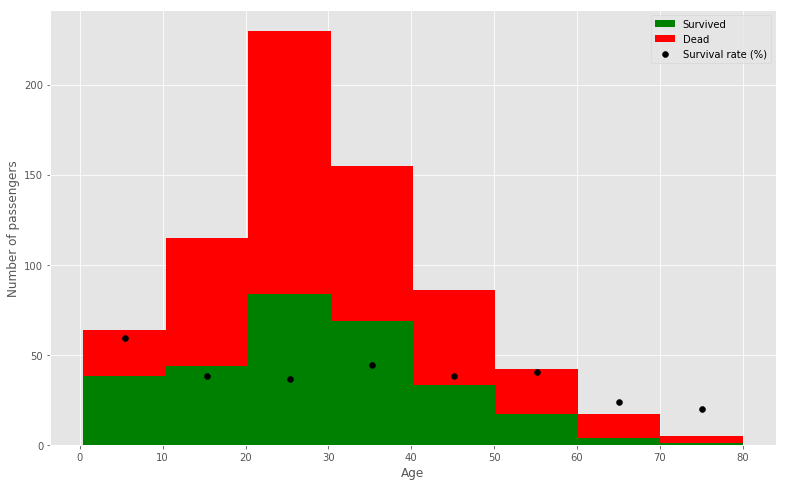

In [10]:
figure = plt.figure(figsize=(13,8))
nbins = 8

a = plt.hist([temp[temp['Survived']==1]['Age'],temp[temp['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = nbins,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
p = [a[0][0][i]/a[0][1][i]*100 for i in range(nbins)]
p = np.nan_to_num(p)
plt.scatter([a[1][i]+40/nbins for i in range(nbins)],p, color = "black", zorder=2, label = "Survival rate (%)")
plt.legend()

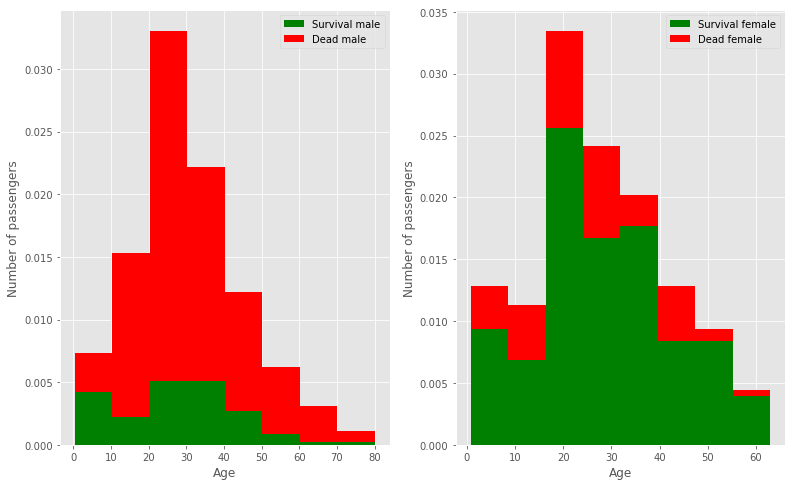

In [11]:
figure = plt.figure(figsize=(13,8))
nbins = 8


plt.subplot(1,2,1)
a = plt.hist([temp[(temp['Survived']==1) & (temp['Sex'] == 'male')]['Age'], temp[(temp['Survived']==0) & (temp['Sex'] == 'male')]['Age']], normed=1, stacked=True, color = ['g','r'],
    bins = nbins,label = ['Survival male','Dead male'], zorder=1)
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.subplot(1,2,2)
b = plt.hist([temp[(temp['Survived']==1) & (temp['Sex'] == 'female')]['Age'], temp[(temp['Survived']==0) & (temp['Sex'] == 'female')]['Age']], normed=1, stacked=True, color = ['g','r'],    bins = nbins,label = ['Survival female','Dead female'], zorder=1)
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

### Fare

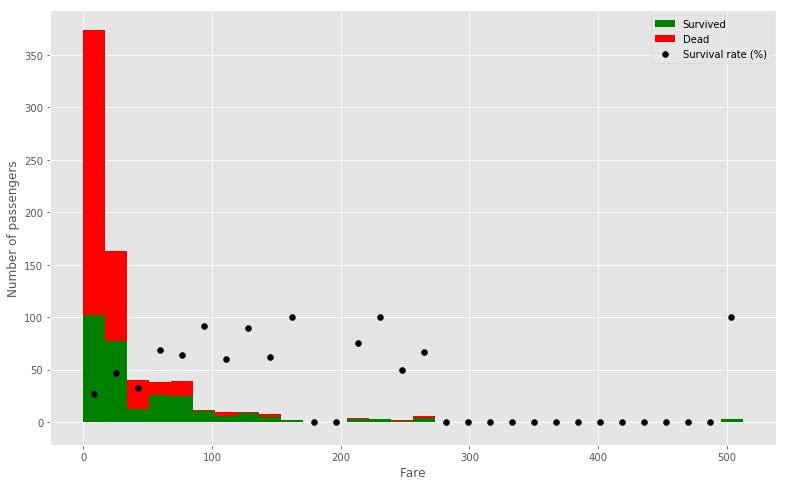

In [12]:
figure = plt.figure(figsize=(13,8))
a = plt.hist([temp[temp['Survived']==1]['Fare'],temp[temp['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
p = [a[0][0][i]/a[0][1][i]*100 for i in range(30)]
p = np.nan_to_num(p)
plt.scatter([a[1][i]+250/30 for i in range(30)],p, color = "black", zorder=2, label = "Survival rate (%)")
plt.legend()

### Embarkation

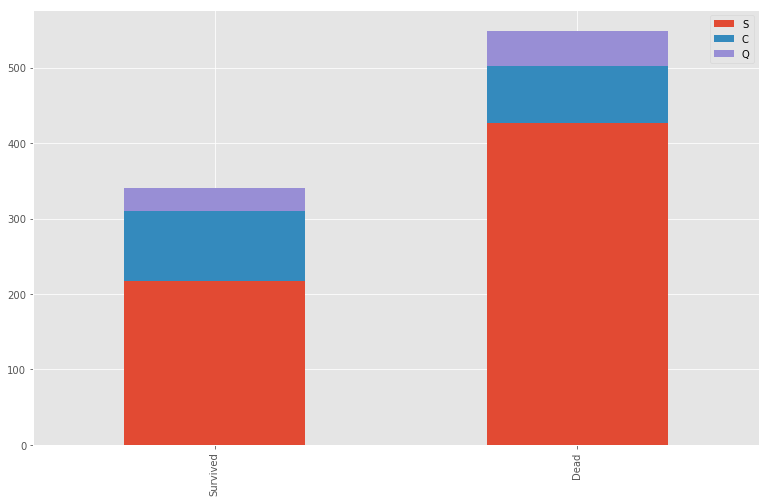

In [13]:
survived_embark = data[data['Survived']==1]['Embarked'].value_counts()
dead_embark = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))

### PClass

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

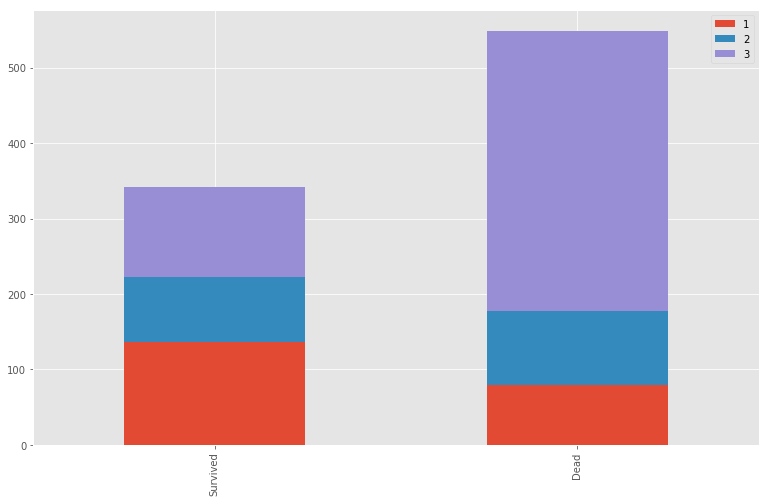

In [14]:
survived_class = data[data['Survived']==1]['Pclass'].value_counts()
dead_class = data[data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([survived_class,dead_class])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(13,8))
data.groupby('Pclass').mean()['Fare']

## Feature engineering

We start by loading the train set and the test set. We create an empty dataframe called combined. Then we append test to train and affect the result to combined.

In [15]:
def get_combined_data():
    # reading train data
    train = pd.read_csv(path+"train.csv")
    
    # reading test data
    test = pd.read_csv(path+"test.csv")

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',axis=1,inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [16]:
cbd = get_combined_data()
cbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### Extracting the passenger titles

In [17]:
def get_titles():

    global cbd
    
    # we extract the title from each name
    cbd['Title'] = cbd['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    cbd['Title'] = cbd.Title.map(Title_Dictionary)

In [18]:
get_titles()

In [19]:
cbd.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


### Processing Embarked

In [20]:
def process_embarked():
    
    global cbd
    # two missing embarked values - filling them with the most frequent one (S)
    cbd.Embarked.fillna('S',inplace=True)
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(cbd['Embarked'],prefix='Embarked')
    cbd = pd.concat([cbd,embarked_dummies],axis=1)

In [21]:
process_embarked()

### Processing Age

In [22]:
g = cbd.groupby(['Sex','Pclass','Embarked','Title'])
g.median()

PassengerId   Age  SibSp  Parch       Fare  \
Sex    Pclass Embarked Title                                                 
female 1      C        Miss           538.0  31.5    0.0    0.0  106.42500   
                       Mrs            898.0  45.0    1.0    0.0   80.68540   
                       Royalty        931.5  43.5    0.5    0.0   74.25000   
              Q        Miss           413.0  33.0    1.0    0.0   90.00000   
                       Mrs           1303.0  37.0    1.0    0.0   90.00000   
              S        Miss           531.0  27.0    0.0    0.0  106.75000   
                       Mrs            821.0  45.0    1.0    0.0   60.00000   
                       Officer        797.0  49.0    0.0    0.0   25.92920   
                       Royalty        760.0  33.0    0.0    0.0   86.50000   
       2      C        Miss           867.0  17.0    1.0    0.0   13.85830   
                       Mrs            742.0  23.5    1.0    0.0   28.89580   
              Q        Miss           313.5  30.0    0.0    0.0   12.35000   
              S        Miss           616.0  20.0    0.0    0.0   21.00000   
                       Mrs            518.0  32.0    0.0    0.0   26.00000   
       3      C        Miss           470.0   9.0    1.0    1.0   14.45830   
                       Mrs            845.0  24.0    0.0    0.5   14.45420   
              Q        Miss           668.0  22.0    0.0    0.0    7.75000   
                       Mrs            772.0  35.5    0.5    0.5   15.50000   
              S        Miss           543.0  20.0    0.0    0.0    9.82500   
                       Mrs            628.5  31.0    1.0    1.0   16.10000   
male   1      C        Master        1022.0   9.5    1.0    2.0  198.43750   
                       Mr             682.0  39.0    0.0    0.0   71.28330   
                       Officer        767.0  50.0    0.0    0.0   35.50000   
                       Royalty        315.5  44.5    0.5    0.0   42.32500   
              Q        Officer        246.0  44.0    2.0    0.0   90.00000   
              S        Master         446.0   4.0    1.0    2.0  120.00000   
                       Mr             615.0  42.0    0.0    0.0   35.25000   
                       Officer        678.0  52.5    0.5    0.0   50.75000   
                       Royalty        823.0  38.0    0.0    0.0    0.00000   
       2      C        Master         828.0   1.0    0.0    2.0   37.00420   
                       Mr             752.0  29.5    0.0    0.0   15.04580   
              Q        Mr             942.0  61.0    0.0    0.0   11.52915   
                       Officer        627.0  57.0    0.0    0.0   12.35000   
              S        Master         479.0   2.0    1.0    1.0   26.00000   
                       Mr             710.5  30.0    0.0    0.0   13.00000   
                       Officer        399.0  41.0    0.0    0.0   13.00000   
       3      C        Master         888.0   6.5    1.0    1.0   15.24580   
                       Mr             713.0  25.5    0.0    0.0    7.22920   
              Q        Master         279.0   7.0    4.0    1.0   29.12500   
                       Mr             711.5  30.0    0.0    0.0    7.75000   
              S        Master         804.5   5.5    3.0    2.0   24.45835   
                       Mr             630.5  26.0    0.0    0.0    7.92500   

                                Embarked_C  Embarked_Q  Embarked_S  
Sex    Pclass Embarked Title                                        
female 1      C        Miss              1           0           0  
                       Mrs               1           0           0  
                       Royalty           1           0           0  
              Q        Miss              0           1           0  
                       Mrs               0           1           0  
              S        Miss              0           0           1  
                       Mrs               0     

In [23]:
def process_ages():
    
    global cbd 
    
    cbd["Age"] = cbd.groupby(['Sex','Pclass','Embarked','Title'])['Age'].transform(lambda x: x.fillna(x.median()))

    # we clean the Name variable
    
    cbd.drop("Name",axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(cbd['Title'],prefix='Title')
    cbd = pd.concat([cbd,titles_dummies],axis=1)
    
    # removing the title variable
    cbd.drop('Title',axis=1,inplace=True)

In [24]:
process_ages()

In [25]:
cbd.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1,0,0,0


### Processing Fare

In [26]:
def process_fares():
    
    global cbd 
    
    cbd["Fare"] = cbd.groupby(['Sex','Pclass','Embarked'])['Fare'].transform(lambda x: x.fillna(x.median()))
    
    cbd.drop('Embarked',axis=1,inplace=True)

In [27]:
process_fares()

In [28]:
cbd.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,0,0,1,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,0,0,0


### Processing Cabin

In [29]:
def process_cabin():
    
    global cbd
    
    # replacing missing cabins with U (for Uknown)
    cbd.Cabin.fillna('U',inplace=True)
    
    # mapping each Cabin value with the cabin letter
    cbd['Cabin'] = cbd['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(cbd['Cabin'],prefix='Cabin')
    
    cbd = pd.concat([cbd,cabin_dummies],axis=1)
    
    cbd.drop('Cabin',axis=1,inplace=True)

In [30]:
process_cabin()

In [31]:
cbd.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,0,0,...,0,0,0,0,0,0,0,0,0,1


### Processing Sex

In [32]:
def process_sex():
    
    global cbd
    # mapping string values to numerical one 
    cbd['Sex'] = cbd['Sex'].map({'male':1,'female':0})

In [33]:
process_sex()

### Processing Pclass

In [34]:
def process_pclass():
    
    global cbd
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(cbd['Pclass'],prefix="Pclass")
    
    # adding dummy variables
    cbd = pd.concat([cbd,pclass_dummies],axis=1)
    
    # removing "Pclass"
    
    cbd.drop('Pclass',axis=1,inplace=True)

In [35]:
process_pclass()

In [36]:
cbd.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,A/5 21171,7.2500,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,2,0,38.0,1,0,PC 17599,71.2833,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,4,0,35.0,1,0,113803,53.1000,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,5,1,35.0,0,0,373450,8.0500,0,0,1,...,0,0,0,0,0,0,1,0,0,1


### Processing Ticket

In [37]:
def process_ticket():
    
    global cbd
    
    # a function that extracts each prefix of the ticket, returns 'X' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket) # removing spaces at the end and beginning
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'X'
    

    # Extracting dummy variables from tickets:

    cbd['Ticket'] = cbd['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(cbd['Ticket'],prefix='Ticket')
    cbd = pd.concat([cbd, tickets_dummies],axis=1)
    cbd.drop('Ticket',inplace=True,axis=1)

In [38]:
process_ticket()

In [39]:
cbd.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X
0,1,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Processing Family

In [40]:
def process_family():
    
    global cbd
    # introducing a new feature : the size of families (including the passenger)
    cbd['FamilySize'] = cbd['Parch'] + cbd['SibSp'] + 1
    
    # introducing other features based on the family size
    cbd['Singleton'] = cbd['FamilySize'].map(lambda s : 1 if s == 1 else 0)
    cbd['SmallFamily'] = cbd['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
    cbd['LargeFamily'] = cbd['FamilySize'].map(lambda s : 1 if 5<=s else 0)

In [41]:
process_family()

In [42]:
cbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 68 columns):
PassengerId       1309 non-null int64
Sex               1309 non-null int64
Age               1309 non-null float64
SibSp             1309 non-null int64
Parch             1309 non-null int64
Fare              1309 non-null float64
Embarked_C        1309 non-null uint8
Embarked_Q        1309 non-null uint8
Embarked_S        1309 non-null uint8
Title_Master      1309 non-null uint8
Title_Miss        1309 non-null uint8
Title_Mr          1309 non-null uint8
Title_Mrs         1309 non-null uint8
Title_Officer     1309 non-null uint8
Title_Royalty     1309 non-null uint8
Cabin_A           1309 non-null uint8
Cabin_B           1309 non-null uint8
Cabin_C           1309 non-null uint8
Cabin_D           1309 non-null uint8
Cabin_E           1309 non-null uint8
Cabin_F           1309 non-null uint8
Cabin_G           1309 non-null uint8
Cabin_T           1309 non-null uint8
Cabin_U        

## Learning process

In [81]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [82]:
def scale_all_features():
    
    global cbd
    
    features = list(cbd.columns)
    features.remove('PassengerId')
    cbd[features] = cbd[features].apply(lambda x: x/x.max(), axis=0)
    
scale_all_features()

def recover_train_test_target():
    global cbd
    
    train0 = pd.read_csv(path+'train.csv')
    
    targets = train0[:891].Survived
    train = cbd[:891]
    test = cbd[891:]

    return (train,test,targets)

In [83]:
X,test,Y = recover_train_test_target()

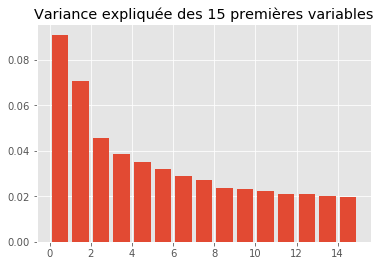

In [84]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components=15)

XP = pca.fit_transform(preprocessing.scale(X))
testP = pca.fit_transform(preprocessing.scale(test))

plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée des 15 premières variables")

plt.figure(figsize=(18,6))
plt.show()

In [85]:
for i in range(15):
    X['PCA'+str(i)]=XP[:,i]
    test['PCA'+str(i)]=testP[:,i]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

### Features selection

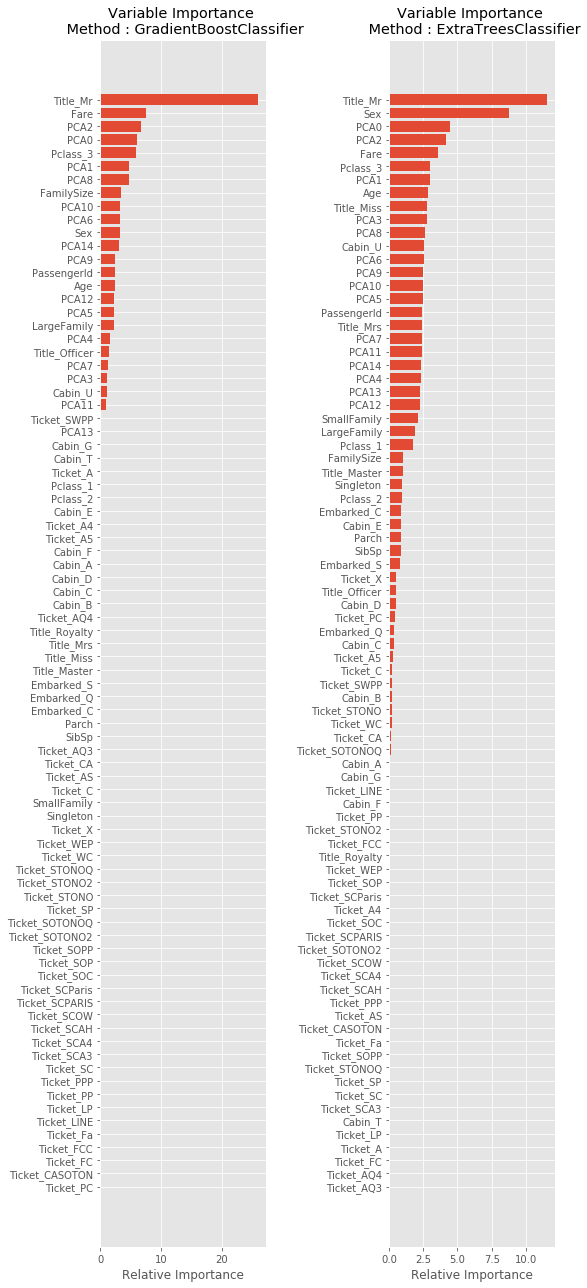

In [87]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

feature_name = X.columns

clf = GradientBoostingClassifier(n_estimators=30)
clf.fit(X_train,y_train)

clf1 = ExtraTreesClassifier(n_estimators=200)
clf1.fit(X_train, y_train)


def barh(c, method) : 
    feature_importance = c.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.sum())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0])
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, feature_name[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance \n Method : '+method)

fig = plt.figure(figsize = (8,18))
plt.subplot(1,2,1)
barh(clf, "GradientBoostClassifier")
plt.subplot(1,2,2)
barh(clf1, "ExtraTreesClassifier")
plt.tight_layout()
plt.legend()

In [88]:
model = SelectFromModel(clf1, prefit=True)
X_new = model.transform(X)
X = X_new

### Testing different MLA with default values

In [90]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

#Machine Learning Algorithm (MLA) Selection and Initialization

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # NeuralNetwork 
    MLPClassifier(),
    ]



#split dataset in cross-validation with an alternative to train_test_split 
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 1 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = Y.copy()

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, X, Y, cv  = cv_split)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3 
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X, Y)
    MLA_predict[MLA_name] = alg.predict(X)
    
    row_index+=1

    
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)

MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.843446,0.816418,0.0626866,0.00310411
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.843258,0.816418,0.0642658,0.00228004
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.849251,0.804104,0.0643535,0.769344
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.969663,0.799627,0.0797923,0.200608
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.981835,0.794403,0.0856105,0.0272199
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.980524,0.789552,0.0993939,0.0597714
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.801124,0.787313,0.0747573,0.00147681
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.787313,0.0658453,0.0258729
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.906367,0.784328,0.0765462,0.1487
12,GaussianNB,{'priors': None},0.801124,0.774254,0.1048,0.00130363


### Tuning hyperparameters

In [93]:
#Hyperparameters Tune with GridSearchCV
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

vote_est = [
    #Ensemble Methods
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM
    ('svc', svm.SVC(probability=True)),
    
    #NeuralNetwork 
    ('nn', MLPClassifier()),

]

grid_param = [
            [{
            #AdaBoostClassifier 
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier
            'learning_rate': [.05], #default=0.1 
            'n_estimators': [300], #default=100
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier 
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False 
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV 
            'fit_intercept': grid_bool, #default: True
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB
            [{}],
    
            [{
            #KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #default: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }]
        ]


import time
start_total = time.perf_counter() 
for clf, param in zip (vote_est, grid_param): 
    

    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(X,Y)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

KeyboardInterrupt: 

#### Random Forest Classifier

In [86]:
forest = RandomForestClassifier(max_features='sqrt')

parameters_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(y_train, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameters_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)

print('Best score on training set: {}'.format(grid_search.best_score_))
print('Best parameters on training set: {}'.format(grid_search.best_params_))

Best score on training set: 0.8338926174496645
Best parameters on training set: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 240}


#### SVM

In [ ]:
svc = svm.SVC()

parameters_grid = { 'kernel': ('linear', 'poly', 'rbf'), 'C':[1, 2] }

cross_validation = StratifiedKFold(y_train, n_folds=3)

grid_search = GridSearchCV(svc, parameters_grid, cv = cross_validation)

grid_search.fit(X_train, y_train)

print('Best score on training set: {}'.format(grid_search.best_score_))
print('Best parameters on training set: {}'.format(grid_search.best_params_))

#### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

nn =  MLPClassifier(solver = 'lbfgs', hidden_layer_sizes=(100,100), random_state=1)
                        
cross_validation = StratifiedKFold(y_train, n_folds=5)

grid_search = GridSearchCV(nn, param_grid={
    'activation' : {'logistic', 'relu'},
    'learning_rate' : {'constant', 'adaptive'},
    'learning_rate_init' : [0.0001, 0.00001, 0.000001],
    'alpha' : [10**(-4), 10**(-5), 10**(-4)]}, cv = cross_validation)

grid_search.fit(X_train, y_train)

print('Best score on training set: {}'.format(grid_search.best_score_))
print('Best parameters on training set: {}'.format(grid_search.best_params_))                    

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn =  KNeighborsClassifier()
                        
cross_validation = StratifiedKFold(y_train, n_folds=5)

grid_search = GridSearchCV(knn, param_grid={
    'n_neighbors' : [1,2,3,4,5] }, cv = cross_validation)

grid_search.fit(X_train, y_train)

print('Best score on training set: {}'.format(grid_search.best_score_))
print('Best parameters on training set: {}'.format(grid_search.best_params_))   

## Submission on Kaggle

In [93]:
test_new = model.transform(test)
output = grid_search.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv(path+'output.csv',index=False)